<a href="https://colab.research.google.com/github/codekshitij/CNN/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(16,(3,3), activation= 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10),
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2 = models.Sequential([
    layers.Conv2D(32,(3,3), activation= 'relu', padding='same' ,input_shape = (32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),


    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(10),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)

In [ ]:
model2.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stoping = EarlyStopping(
    monitor = 'val_loss',
    patience = 2,
    restore_best_weights = True,
)

history = model2.fit(x_train, y_train, epochs=10, callbacks=[early_stoping], validation_split=0.1, batch_size=60)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4387 - loss: 1.7109 - val_accuracy: 0.6254 - val_loss: 1.1048
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6581 - loss: 0.9767 - val_accuracy: 0.7042 - val_loss: 0.8672
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7202 - loss: 0.7976 - val_accuracy: 0.7360 - val_loss: 0.8179
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7609 - loss: 0.6870 - val_accuracy: 0.7144 - val_loss: 0.8881
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7928 - loss: 0.5882 - val_accuracy: 0.7710 - val_loss: 0.6801
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8220 - loss: 0.5069 - val_accuracy: 0.7678 - val_loss: 0.6949
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8393 - loss: 0.4607 - val_accuracy: 0.7670 - val_loss: 0.7070


In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose = 2)
print(f"\nTest Accuracy : {test_acc*100:.2f}%")

313/313 - 2s - 7ms/step - accuracy: 0.7582 - loss: 0.7270

Test Accuracy : 75.82%


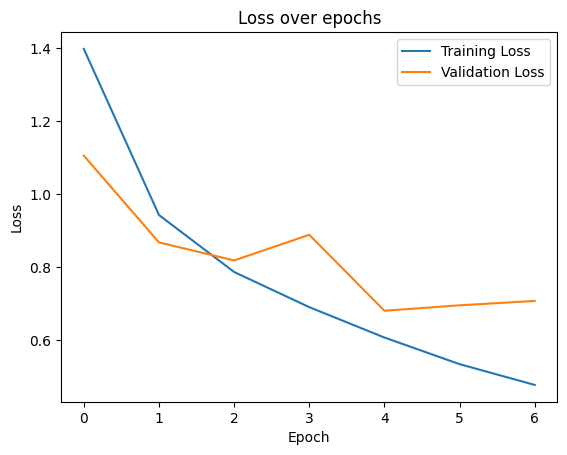

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over epochs")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
